In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import style
from scipy.ndimage.filters import gaussian_filter1d

style.use("seaborn")

<Figure size 432x288 with 0 Axes>

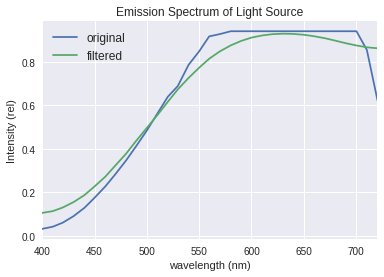

In [3]:
#light source 
M = np.loadtxt("creference.txt", float)
M_lambda = M[:,0] #wavelength
M_int = M[:,1]  #intensity
M_int_smoothed = gaussian_filter1d(M_int, sigma=4)

plt.figure(figsize=(6,4))
fig,ax = plt.subplots()
ax.plot(M_lambda, M_int, label ="original")
ax.plot(M_lambda, M_int_smoothed, label ="filtered")
legend = ax.legend(loc='upper left', fontsize='large')
plt.title("Emission Spectrum of Light Source")
plt.xlabel("wavelength (nm)")
plt.ylabel("Intensity (rel)")
plt.xlim(400,720)

plt.show()

<Figure size 432x288 with 0 Axes>

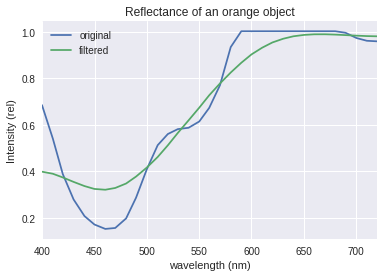

In [4]:
#reflectance of the object
R = np.loadtxt("cyellow.txt", float)
R_lambda = R[:,0] #wavelength
R_int = R[:,1]/M_int  #reflectance
R_int_smoothed = gaussian_filter1d(R_int, sigma=4)

plt.figure(figsize=(6,4))
fig,ax = plt.subplots()
ax.plot(R_lambda,R_int, label ="original")
ax.plot(R_lambda, R_int_smoothed, label ="filtered")
plt.title("Reflectance of an orange object")
plt.xlabel("wavelength (nm)")
plt.ylabel("Intensity (rel)")
plt.xlim(400,720)
plt.legend()
plt.show()



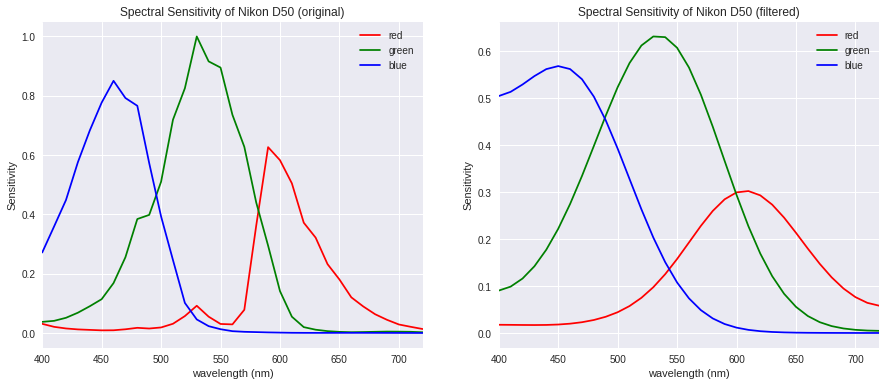

In [5]:
#spectral sensitivity of camera: Canon 10D 
S = np.loadtxt("NikonD50.txt", float)
S_lambda = S[:,0] #wavelength
S_red = S[:,1] #spectral sensitivity - red channel
S_green = S[:,2] #spectral sensitivity - green channel
S_blue = S[:,3] #spectral sensitivity - blue channel


r_smoothed = gaussian_filter1d(S_red, sigma=4)
g_smoothed = gaussian_filter1d(S_green, sigma=4)
b_smoothed = gaussian_filter1d(S_blue, sigma=4)

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(S_lambda, S_red, "r", label = "red")
plt.plot(S_lambda, S_green, "g", label = "green")
plt.plot(S_lambda, S_blue, "b", label = "blue")
plt.title("Spectral Sensitivity of Nikon D50 (original)")
plt.xlabel("wavelength (nm)")
plt.ylabel("Sensitivity")
plt.xlim(400,720)
plt.legend()

plt.subplot(122)
plt.plot(S_lambda, r_smoothed, "r", label = "red")
plt.plot(S_lambda, g_smoothed, "g", label = "green")
plt.plot(S_lambda, b_smoothed, "b", label = "blue")
plt.title("Spectral Sensitivity of Nikon D50 (filtered)")
plt.xlabel("wavelength (nm)")
plt.ylabel("Sensitivity")
plt.xlim(400,720)
plt.legend()
plt.show()



In [6]:
DN_red = M_int*R_int*S_red
DN_green = M_int*R_int*S_green
DN_blue = M_int*R_int*S_blue

red_smoothed = M_int_smoothed*R_int_smoothed*r_smoothed 
green_smoothed = M_int_smoothed*R_int_smoothed*g_smoothed 
blue_smoothed = M_int_smoothed*R_int_smoothed*b_smoothed 

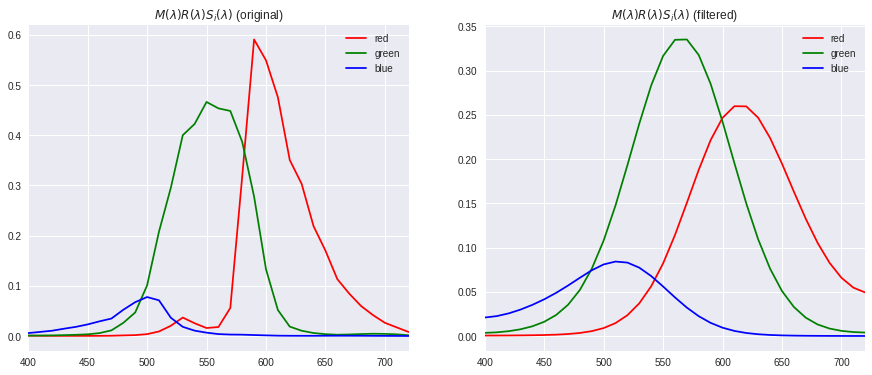

In [7]:
plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(S_lambda, DN_red, "r", label = "red")
plt.plot(S_lambda, DN_green, "g", label = "green")
plt.plot(S_lambda, DN_blue, "b", label = "blue")
plt.xlim(400,720)
plt.title("$M(\lambda)R(\lambda)S_{i}(\lambda)$ (original)")
plt.legend()

plt.subplot(122)
plt.plot(S_lambda, red_smoothed, "r", label = "red")
plt.plot(S_lambda, green_smoothed, "g", label = "green")
plt.plot(S_lambda, blue_smoothed, "b", label = "blue")
plt.xlim(400,720)
plt.legend()
plt.title("$M(\lambda)R(\lambda)S_{i}(\lambda)$ (filtered)")
plt.show()

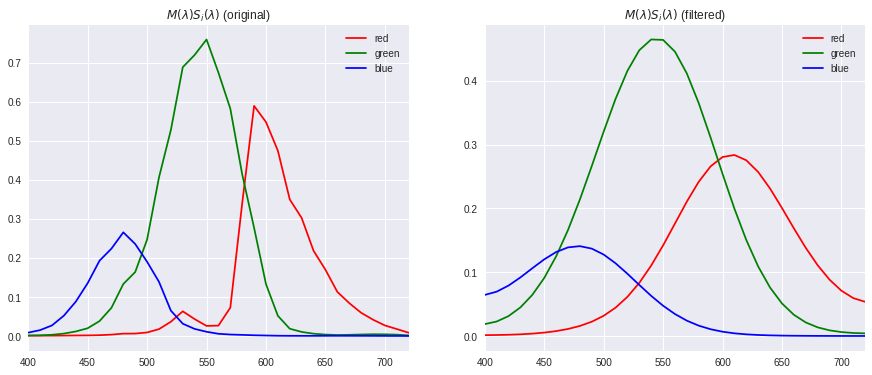

In [8]:
den_red = M_int*S_red
den_green = M_int*S_green 
den_blue = M_int*S_blue

den_rsmoothed = gaussian_filter1d(den_red, sigma=4)
den_gsmoothed = gaussian_filter1d(den_green, sigma=4)
den_bsmoothed = gaussian_filter1d(den_blue, sigma=4)


plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(S_lambda, den_red, "r", label = "red")
plt.plot(S_lambda, den_green, "g", label = "green")
plt.plot(S_lambda, den_blue, "b", label = "blue")
plt.xlim(400,720)
plt.title("$M(\lambda)S_{i}(\lambda)$ (original)")
plt.legend()

plt.subplot(122)
plt.plot(S_lambda, den_rsmoothed, "r", label = "red")
plt.plot(S_lambda, den_gsmoothed, "g", label = "green")
plt.plot(S_lambda, den_bsmoothed, "b", label = "blue")
plt.xlim(400,720)
plt.legend()
plt.title("$M(\lambda)S_{i}(\lambda)$ (filtered)")
plt.show()

In [9]:
Area_red_num = np.trapz(DN_red, S_lambda)
Area_green_num = np.trapz(DN_green, S_lambda)
Area_blue_num = np.trapz(DN_blue, S_lambda)


Area_red_nums = np.trapz(red_smoothed, S_lambda)
Area_green_nums = np.trapz(green_smoothed, S_lambda)
Area_blue_nums = np.trapz(blue_smoothed, S_lambda)

Area_red_den = np.trapz(den_red, S_lambda)
Area_green_den = np.trapz(den_green, S_lambda)
Area_blue_den = np.trapz(den_blue, S_lambda)


Area_red_dens = np.trapz(den_rsmoothed, S_lambda)
Area_green_dens = np.trapz(den_gsmoothed, S_lambda)
Area_blue_dens = np.trapz(den_bsmoothed, S_lambda)

In [10]:
R = Area_red_num/Area_red_den
R*255

244.9132927851167

In [11]:
G = Area_green_num/Area_green_den
G*255

161.96366791572157

In [12]:
B = Area_blue_num/Area_blue_den
B*255

74.24267506750188

In [13]:
Rs = Area_red_nums/Area_red_dens
Gs = Area_green_nums/Area_green_dens
Bs = Area_blue_nums/Area_blue_dens

In [14]:
Rs*255

208.8284504693925

In [15]:
Gs*255

158.08238120058445

In [16]:
Bs*255

151.67139465945402